In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
df=pd.read_csv('../data/diabetes_feature.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,preg_high,Age_low,Age_middle,Age_high,Insulin_n,Insulin_log,low_glu_insulin
0,6,0.911763,72,35,0,33.6,0.495819,50,1,False,False,True,False,206.846154,5.336798,False
1,1,-1.100140,66,29,0,26.6,-0.363426,31,0,False,False,True,False,130.287879,4.877392,True
2,8,2.029486,64,0,0,23.3,0.635913,32,1,True,False,True,False,206.846154,5.336798,False
3,1,-0.972400,66,23,94,28.1,-0.936255,21,0,False,True,False,False,94.000000,4.553877,True
4,0,0.560478,40,35,168,43.1,5.666850,33,1,False,False,True,False,168.000000,5.129899,False


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'preg_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_n', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

## Base Model (전처리 완료 된)

### Train, Test Split

In [32]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_n',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high','low_glu_insulin']]
y = df['Outcome']

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit

In [34]:
base_model = DecisionTreeClassifier(random_state=1111)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1111)

### Tree 그리기

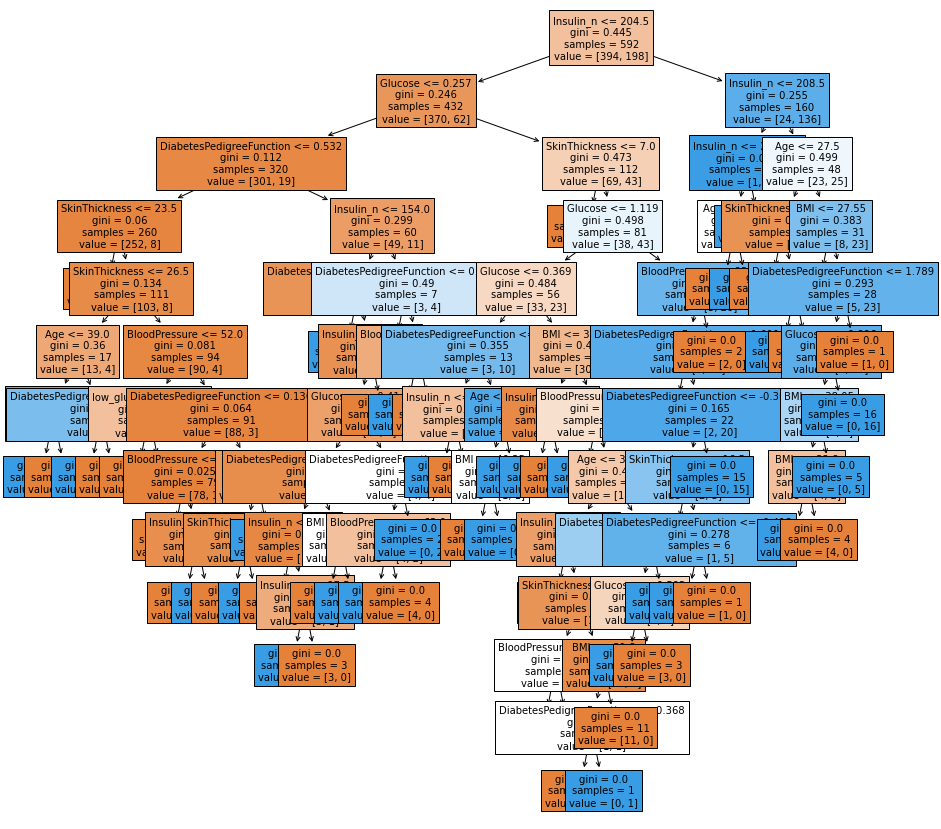

In [35]:
feature_names=X_train.columns.tolist()

plt.figure(figsize=(15,15))
tree = plot_tree(base_model, fontsize=10, feature_names = feature_names, filled=True)


### predict, accuracy

In [36]:
pred1=base_model.predict(X_test)
accuracy_score(y_test,pred1)

0.9060402684563759

## Model1. Max_depth 추가

- 조절 전 트리 깊이가 11인데, 너무 깊어서 오버피팅 될 수 있다.

### fit

In [38]:
model1 = DecisionTreeClassifier(random_state=1111, max_depth = 7)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1111)

### Tree 그리기

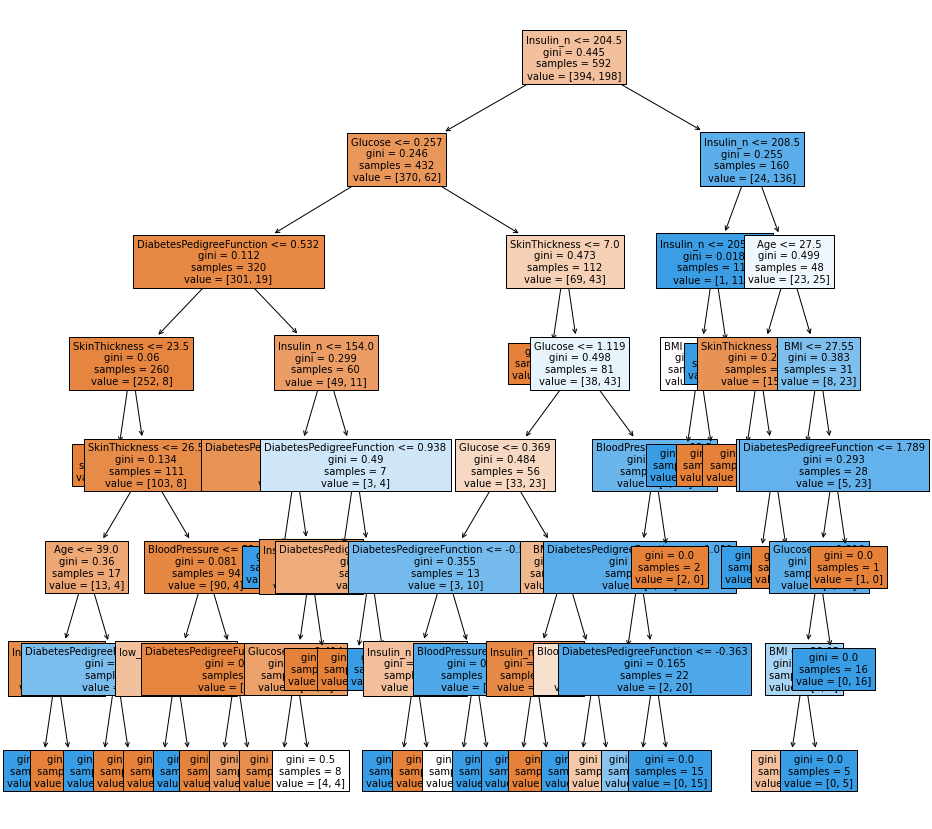

In [39]:
feature_names=X_train.columns.tolist()

plt.figure(figsize=(15,15))
tree = plot_tree(model1, fontsize=10, feature_names = feature_names, filled=True)

### predict, accuracy

In [40]:
pred2=model1.predict(X_test)
accuracy_score(y_test,pred2)

0.8926174496644296

## For 문으로 Max_depth 찾기

In [43]:
for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state = 1111)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 87.91946308724832
4 88.59060402684564
5 87.24832214765101
6 88.59060402684564
7 89.26174496644296
8 88.59060402684564
9 87.24832214765101
10 90.60402684563759
11 90.60402684563759


## Grid Search

cross validation은 train 데이셋을 여러 fold로 나누어서 평균을 내는 방법


In [69]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=1111)

#mat_features 는 feature의 일부만 사용하고 싶을때, 1은 전체 라는 뜻
# n_jobs 
param_grid = {"max_depth":range(3,12),
              "max_features":[0,3,0.5, 0.7, 0.9, 1],
             }

#cv: cross validation 수
#verbose: 1 - log 찍음,0 - 로그안찍음
clf=GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5 , verbose=1)
clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1111),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0, 3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

### Fit

In [70]:
clf.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1111),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0, 3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

### best 값 확인

In [71]:
clf.best_params_

{'max_depth': 4, 'max_features': 0.9}

In [72]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.9, random_state=1111)

In [73]:
clf.best_score_

0.8784361202107961

In [49]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.008008,0.001270,0.004585,0.001302,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.882353,0.840336,0.872881,0.906780,0.889831,0.878436,0.022050,1
15,0.008394,0.001672,0.005588,0.002161,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.873950,0.857143,0.864407,0.898305,0.872881,0.873337,0.013900,2
4,0.011561,0.004295,0.007523,0.006072,3,0.9,"{'max_depth': 3, 'max_features': 0.9}",0.882353,0.848739,0.864407,0.889831,0.881356,0.873337,0.014849,2
3,0.010974,0.001123,0.004912,0.001816,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.865546,0.848739,0.872881,0.898305,0.872881,0.871671,0.015973,4
21,0.008141,0.001934,0.003773,0.000626,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.865546,0.857143,0.872881,0.906780,0.855932,0.871656,0.018603,5
27,0.013792,0.003280,0.004847,0.000827,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.890756,0.873950,0.847458,0.889831,0.855932,0.871585,0.017511,6
16,0.007958,0.000810,0.004658,0.001685,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.848739,0.857143,0.864407,0.889831,0.872881,0.866600,0.014088,7
33,0.008518,0.000958,0.003835,0.000835,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.882353,0.857143,0.855932,0.855932,0.881356,0.866543,0.012513,8
28,0.012759,0.003991,0.008176,0.002813,7,0.9,"{'max_depth': 7, 'max_features': 0.9}",0.873950,0.857143,0.855932,0.906780,0.830508,0.864863,0.025136,9
9,0.008027,0.000889,0.003432,0.000305,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.848739,0.823529,0.864407,0.889831,0.881356,0.861572,0.023706,10


### predict

In [74]:
pred=clf.predict(X_test)

In [75]:
accuracy_score(y_test,pred)

0.8859060402684564

## Random Search

In [76]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "max_depth" : np.random.randint(3,20,10),
    "max_features": np.random.uniform(0.1,1.0,100)
}
clf = RandomizedSearchCV(model,
                  param_distributions= param_distributions,
                  n_iter = 1000,
                  scoring = "accuracy",
                  n_jobs = -1,
                  cv = 5,
                  random_state=1111)

### Fit

iter 

In [77]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1111),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6, 12, 15,  8, 11, 12, 12, 15, 19]),
                                        'max_features': array([0.24423079, 0.56047901, 0.19467209, 0.50937518, 0.75754265,
       0.68703314, 0.65929167, 0.49442904, 0.77819133, 0.80192976,
       0.26118399, 0.84165486, 0.75894184, 0.15533504, 0.69721...
       0.3975415 , 0.74813104, 0.91528115, 0.89670294, 0.20969244,
       0.62910783, 0.41747844, 0.52261741, 0.33026613, 0.68194325,
       0.68339406, 0.45832365, 0.81915323, 0.23404024, 0.86409219,
       0.99162349, 0.22771196, 0.32247124, 0.10708797, 0.67241299,
       0.54007186, 0.32988964, 0.5143893 , 0.33044685, 0.31761462,
       0.62018797, 0.51020782, 0.85050074, 0.88137577, 0.64148195])},
                   random_state=1111, scoring='accuracy')

### best 값 확인

In [78]:
clf.best_params_

{'max_features': 0.7575426468912877, 'max_depth': 5}

In [79]:
clf.best_score_

0.8733371314627545

### predict

In [80]:
pred=clf.predict(X_test)
accuracy_score(y_test,pred)

0.8993288590604027